In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

# !apt -qq -y install fonts-nanum

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

# **1. 데이터 준비**
출처: https://www.kaggle.com/datasets/residentmario/ramen-ratings/data

'Ramen Rater'라는 하드코어 라면 매니아(또는 라면 애호가)를 위한 라면 리뷰 사이트가 있는데,

이 사이트에서 리뷰된 2500개 이상의 라면에 대한 리뷰 정보를 담은 데이터셋입니다.

데이터셋은 캐글에서 가져왔습니다.


In [2]:
# 데이터 불러오기
df_ramen = pd.read_csv('ramen-ratings.csv')

# **2. 데이터 보기**



In [3]:
# 기본 정보 출력
df_ramen.info()
print("\n")

# 기초 통계 확인
df_ramen.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB




,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [4]:
# 상위 5개 데이터 확인
df_ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


1. Review 열은 각각의 리뷰에 대한 번호를 매겨놓은 것입니다.
2. Brand 열은 해당 라면 제조사의 브랜드 명입니다.
3. Variety 열은 라면의 이름 입니다.
4. Style 열은 라면의 제공 방식에 대한 분류입니다. (컵라면, 봉지라면 등등)
5. Country 열은 해당 라면을 판매하는 국가입니다.
6. Stars 열은 해당 라면의 대한 별점입니다. 최대 5.0점 입니다.
7. Top Ten 열은 2016년 해당 사이트에서 별점 상위 10위 안에 든 것들을 매겨 놓은 것입니다. ( 10개를 제외한 나머지 데이터는 null 값을 가집니다.)


In [5]:
# 별점 기준으로 오름차순 정렬한 것을 출력
df_ramen.sort_values(by=['Stars'])

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
557,2023,Urban Noodle,Authentic Street Food Black Bean,Cup,UK,0,NaN
2194,386,US Canning,Fu Chang Chinese Noodle Company Pork Seafood,Tray,USA,0,NaN
717,1863,Baijia,Broad Noodle Pickled Vegetable Artificial Beef...,Pack,China,0,NaN
667,1913,Thai Smile,Mushroom Rice Noodle Soup Bowl,Bowl,USA,0,NaN
2537,43,Kim Ve Wong,Jaopai Series: Vegetarian Instant Noodles,Bowl,Taiwan,0,NaN
...,...,...,...,...,...,...,...
447,2133,Nissin,Kimchi Chikin Ramen Donburi,Bowl,Japan,5.00,NaN
591,1989,MyKuali,Penang White curry Noodle Authentic Taste,Pack,Malaysia,5.00,NaN
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


# **3. 데이터 클린징**



In [6]:
# 결측치 값 확인
df_ramen.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

Style 열에 2개의 결측치가 있고, Top Ten 열에 10위가 아닌 데이터들에 결측치가 있습니다.

Style 열의 결측치는 가장 많이 나온 값으로, Top Ten 열은 0으로 대체합니다.

In [7]:
# Style 열의 빈도수 확인
df_ramen.groupby('Style')['Style'].count()

Style
Bar        1
Bowl     481
Box        6
Can        1
Cup      450
Pack    1531
Tray     108
Name: Style, dtype: int64

In [8]:
# Pack 이 가장 많이 나오므로 Pack 으로 대체, Top ten 은 0으로 대체
df_ramen['Style'] = df_ramen['Style'].fillna('Pack')
df_ramen['Top Ten'] = df_ramen['Top Ten'].fillna(0)

df_ramen.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

In [9]:
# Country 열의 빈도수 확인
df_ramen.groupby('Country')['Country'].count()

Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            169
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         156
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           224
Thailand         191
UK                69
USA              323
United States      1
Vietnam          108
Name: Country, dtype: int64

In [10]:
# 100개 이하의 리뷰를 가지는 국가를 제거
df_ramen = df_ramen.loc[(df_ramen.Country == 'China') | (df_ramen.Country == 'Hong Kong') | (df_ramen.Country == 'Indonesia') |
             (df_ramen.Country == 'Japan') | (df_ramen.Country == 'Malaysia') | (df_ramen.Country == 'Singapore') |
             (df_ramen.Country == 'South Korea') | (df_ramen.Country == 'Taiwan') | (df_ramen.Country == 'Thailand') |
             (df_ramen.Country == 'USA') | (df_ramen.Country == 'Vietnam')]

# Country 빈도수 확인
df_ramen.groupby('Country')['Country'].count()

Country
China          169
Hong Kong      137
Indonesia      126
Japan          352
Malaysia       156
Singapore      109
South Korea    309
Taiwan         224
Thailand       191
USA            323
Vietnam        108
Name: Country, dtype: int64

# **4. 데이터 탐색**



In [11]:
# 데이터 바이닝 - 연속형 변수인 별점을 범주화

# 바이닝 전 Stars 열을 float 자료형으로 변환
df_ramen = df_ramen.replace({'Stars':'Unrated'}, 2.5)   # 별점이 없는 경우 중앙값인 2.5로 변환
df_ramen['Stars'] = df_ramen['Stars'].astype(float)

bins = [0, 2.5, 3.5, 5]
df_stars = pd.cut(df_ramen['Stars'], bins, labels = ['비추천', '보통', '추천'])
df_ramen['Stars_class'] = df_stars
df_ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_class
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,추천
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,비추천
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,비추천
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,보통
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,0,추천
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,보통
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,비추천
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,비추천
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0,비추천


In [12]:
# 비추천인 데이터만 모으기
notRecom = df_ramen[df_ramen.Stars_class.isin(['비추천'])]
notRecom

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_class
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,비추천
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,비추천
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,0,비추천
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.50,0,비추천
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,2.50,0,비추천
...,...,...,...,...,...,...,...,...
2574,6,Vifon,Nam Vang,Pack,Vietnam,2.50,0,비추천
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,비추천
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,비추천
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0,비추천


In [13]:
# 비추천 데이터 제외 필터링
nnR = df_ramen[~df_ramen.Stars_class.isin(['비추천'])]
nnR

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_class
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,추천
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,보통
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,0,추천
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,0,추천
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,0,추천
...,...,...,...,...,...,...,...,...
2564,16,Samyang,Kalgug-Su (Spicy),Pack,South Korea,3.50,0,보통
2566,14,Samyang,Hot,Pack,South Korea,3.50,0,보통
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.00,2012 #4,추천
2572,8,Tung-I,Chinese Beef Instant Rice Noodle,Pack,Taiwan,3.00,0,보통


In [14]:
# 전체를 3개 범주로 구분
df_stars2 = pd.qcut(df_ramen["Stars"], q=3, labels =["비추천", "보통", "추천"])
df_ramen["Stars_class2"] = df_stars2
df_ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_class,Stars_class2
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,추천,보통
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,비추천,비추천
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,비추천,비추천
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,보통,비추천
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,0,추천,추천
...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,보통,비추천
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,비추천,비추천
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,비추천,비추천
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0,비추천,비추천


In [15]:
# Stars_class 를 원핫인코딩
df_dum = pd.get_dummies(df_ramen, columns = ['Stars_class'])
df_dum

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_class2,Stars_class_비추천,Stars_class_보통,Stars_class_추천
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,보통,0,0,1
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0,비추천,1,0,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,비추천,1,0,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,비추천,0,1,0
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,0,추천,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,0,비추천,0,1,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,0,비추천,1,0,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,0,비추천,1,0,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,0,비추천,1,0,0


In [16]:
# Style, Country 그룹에 의한 별점을 데이터프레임으로 계산
df1 = df_dum.groupby(['Style', 'Country'])['Stars'].mean()
df1

Style  Country    
Bar    USA            5.000000
Bowl   China          3.527778
       Hong Kong      3.735000
       Japan          4.140278
       Malaysia       4.281250
       Singapore      4.096154
       South Korea    3.865809
       Taiwan         3.263514
       Thailand       3.142045
       USA            3.400000
       Vietnam        3.362500
Box    Indonesia      4.250000
       Japan          5.000000
       Malaysia       5.000000
       USA            1.500000
Can    USA            3.500000
Cup    China          2.859375
       Hong Kong      4.039474
       Indonesia      3.940476
       Japan          3.940816
       Malaysia       4.011905
       Singapore      3.925926
       South Korea    3.500000
       Taiwan         3.250000
       Thailand       3.588542
       USA            3.376786
       Vietnam        2.656250
Pack   China          3.540909
       Hong Kong      3.702239
       Indonesia      4.091346
       Japan          3.801613
       Malaysia     

In [17]:
df2 = df1.unstack('Style')
df2

Style,Bar,Bowl,Box,Can,Cup,Pack,Tray
Country,,,,,,,
China,NaN,3.527778,NaN,NaN,2.859375,3.540909,2.583333
Hong Kong,NaN,3.735000,NaN,NaN,4.039474,3.702239,3.625000
Indonesia,NaN,NaN,4.25,NaN,3.940476,4.091346,NaN
Japan,NaN,4.140278,5.00,NaN,3.940816,3.801613,4.375000
Malaysia,NaN,4.281250,5.00,NaN,4.011905,4.143200,NaN
Singapore,NaN,4.096154,NaN,NaN,3.925926,4.210145,NaN
South Korea,NaN,3.865809,NaN,NaN,3.500000,3.842623,3.479167
Taiwan,NaN,3.263514,NaN,NaN,3.250000,3.757143,3.333333
Thailand,NaN,3.142045,NaN,NaN,3.588542,3.386598,3.750000


# **5. 데이터 시각화 분석**

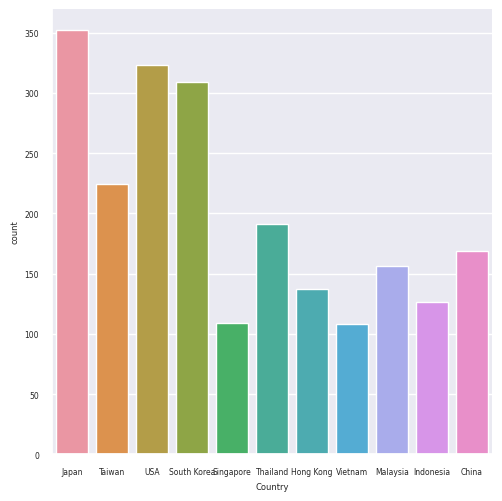

In [18]:
sns.set(rc={'figure.figsize':(12, 6)}, font_scale=0.5)

sns.catplot(x='Country', kind='count', data=df_ramen)

리뷰에서 가장 많이 등장한 국가 5개는 일본, 미국, 한국, 대만, 태국 입니다.

<Axes: >

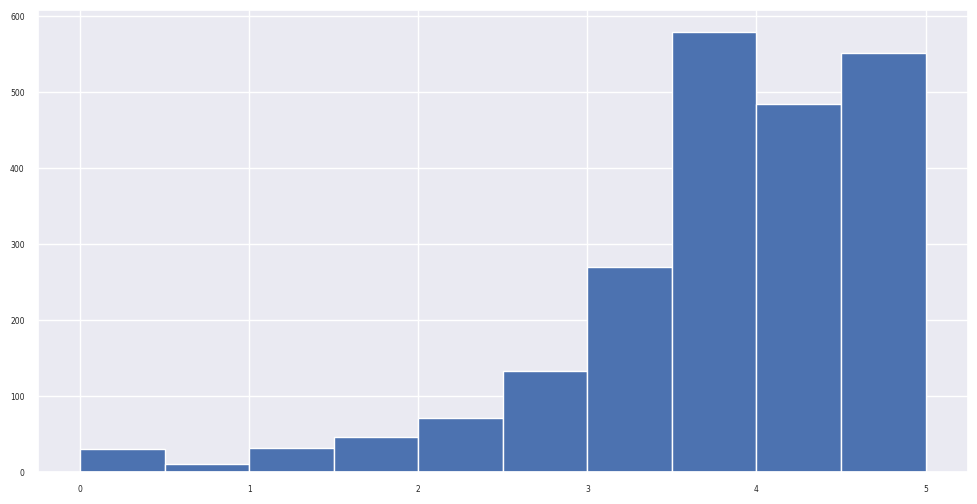

In [19]:
# 별점 분포 확인

df_ramen['Stars'].hist()

별점을 3점 이상으로 매긴 데이터가 압도적으로 많습니다.

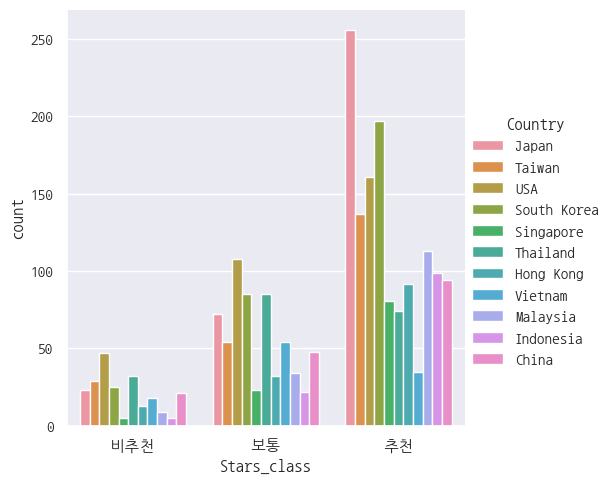

In [20]:
# 국가 별 추천도 확인
sns.set(rc = {'font.family':'NanumGothicCoding'})
sns.catplot(x='Stars_class', kind='count', hue='Country', data=df_ramen)

위 그래프에서 보여지는 것을 분석하자면,

**국가에 따라 추천/비추천&보통 비율이 다르다는 것입니다.**

**태국**의 경우 추천보다 보통인 리뷰가 좀 더 많이 나타고 있고,

**미국**의 경우에도 추천과 비추천&보통 비율이 비슷한 양상을 보입니다.

**베트남**의 경우는 오히려 추천보다 비추천&보통인 리뷰가 훨씬 많은 것으로 나타났습니다.

반면,

베트남과 같은 동남아시아 국가인 **말레이시아, 인도네시아** 등은 추천 리뷰가 압도적으로 많습니다.

또한, 일본과 한국, 중국과 같은 동아시아 국가들도 추천 리뷰가 우세합니다.

정리해보자면,

**동아시아 국가의 라면들은 대체적으로 좋은 평가를 받는 경향이 있습니다.**

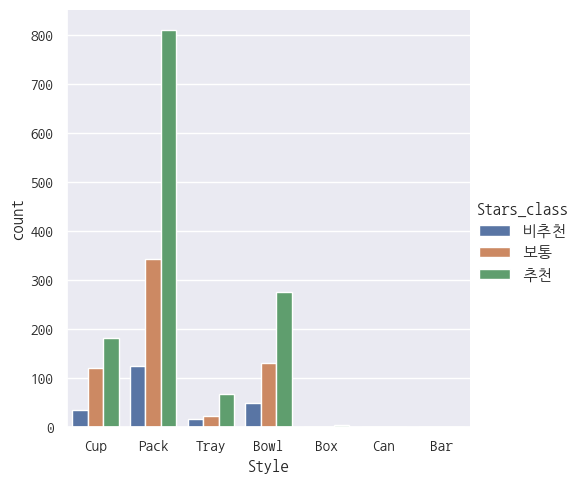

In [21]:
# Style에 따른 추천도 확인
sns.set(rc = {'font.family':'NanumGothicCoding'})
sns.catplot(x='Style', kind='count', hue='Stars_class', data=df_ramen)

표본이 적은 Tray를 제외하고,

Cup 같은 경우는 추천/비추천&보통 비율이 비슷하다.

Bowl 같은 경우는 추천 쪽이 좀 더 우세하고,

Pack 같은 경우는 추천 비율이 압도적으로 우세하다.

즉, 다른 종류에 비해 **Pack 으로 제공하는 라면은 좋은 평가를 받는 경향을 보입니다.**

In [25]:
# 브랜드에 따른 추천도를 확인
# 먼저, 한국 브랜드로 한정하여 확인
df_kor = df_ramen.loc[(df_ramen.Country == 'South Korea')]
df_kor.groupby('Brand')['Brand'].count()

Brand
Bon Go Jang            2
CJ CheilJedang         2
Chorip Dong            1
ChoripDong             1
Dongwon                1
Emart                  7
Foodmon                2
GS25                   2
Global Inspiration     1
Good Tto Leu Foods     1
Guava Story            1
Haioreum               1
Han's South Korea      3
Hi-Myon                2
HoMyeonDang            5
Migawon                1
Mr. Udon               4
Nongshim              57
Noodle Time            1
O Sung                 1
Ohsung                 3
Ottogi                42
Paldo                 65
Pulmuone               8
Rhee Bros Assi         6
Sahmyook               1
Saigon Ve Wong         1
Samyang               19
Samyang Foods         50
Sempio                 3
Six Fortune            6
Song Hak               1
Sura                   1
Sutah                  1
Wang                   6
Name: Brand, dtype: int64

상위 4개의 브랜드를 대상으로 분석을 진행한다. (팔도, 농심, 삼양, 오뚜기)

또한 같은 회사인 삼양과 삼양푸드를 통일하기 위해, 삼양푸드를 삼양으로 바꾼다.

In [26]:
df_kor = df_kor.replace({'Brand' : 'Samyang Foods'}, 'Samyang')
df_kor.groupby('Brand')['Brand'].count()

Brand
Bon Go Jang            2
CJ CheilJedang         2
Chorip Dong            1
ChoripDong             1
Dongwon                1
Emart                  7
Foodmon                2
GS25                   2
Global Inspiration     1
Good Tto Leu Foods     1
Guava Story            1
Haioreum               1
Han's South Korea      3
Hi-Myon                2
HoMyeonDang            5
Migawon                1
Mr. Udon               4
Nongshim              57
Noodle Time            1
O Sung                 1
Ohsung                 3
Ottogi                42
Paldo                 65
Pulmuone               8
Rhee Bros Assi         6
Sahmyook               1
Saigon Ve Wong         1
Samyang               69
Sempio                 3
Six Fortune            6
Song Hak               1
Sura                   1
Sutah                  1
Wang                   6
Name: Brand, dtype: int64

In [28]:
df_kor = df_kor.loc[(df_ramen.Brand == 'Samyang') | (df_ramen.Brand == 'Paldo') | (df_ramen.Brand == 'Nongshim') | (df_ramen.Brand == 'Ottogi')]
df_kor.groupby('Brand')['Brand'].count()

Brand
Nongshim    57
Ottogi      42
Paldo       65
Samyang     19
Name: Brand, dtype: int64

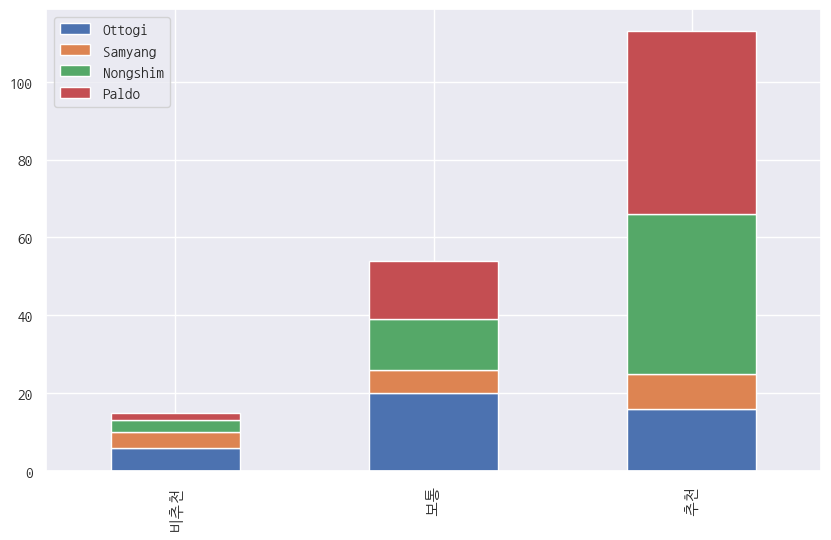

In [30]:
def bar_chart(feature):
    bichu = df_kor[df_kor['Stars_class']=='비추천'][feature].value_counts()
    norm = df_kor[df_kor['Stars_class']=='보통'][feature].value_counts()
    chu = df_kor[df_kor['Stars_class']=='추천'][feature].value_counts()
    df_ram = pd.DataFrame([bichu,norm,chu])
    df_ram.index = ['비추천','보통','추천']
    df_ram.plot(kind='bar',stacked=True, figsize=(10,6))

bar_chart('Brand')

위 그래프를 보면,

삼양의 경우, 비추천/보통/추천의 비율이 거의 동일한 것을 볼 수 있다.

오뚜기의 경우, 추천의 비율이 상대적으로 낮습니다.

팔도와 농심은 추천의 비율이 높습니다.

즉, 한국 라면은 **팔도와 농심의 라면들은 좋은 평가를 받는 경향을 보입니다.**

# **데이터 분석 요약**

많은 리뷰가 있는 국가의 경우 비추천보다 보통 이상의 평가가 압도적으로 많습니다.

동아시아의 라면일수록 평가가 좋아집니다.

컵라면의 경우 평가가 갈리는 경우가 많으며, 팩라면의 경우 좋은 평가를 받는 경향이 있습니다.

국내 브랜드의 경우, 팔도와 농심의 라면들은 추천수가 많으며, 삼양은 큰 차이는 없습니다.





